In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mne.io import RawArray
from mne import create_info

In [4]:
data = np.load('resampled.npy')

In [5]:
info = create_info(data.shape[0], 200, 'eeg')

In [6]:
raw = RawArray(data, info)

Creating RawArray with float64 data, n_channels=124, n_times=2359235
    Range : 0 ... 2359234 =      0.000 ... 11796.170 secs
Ready.


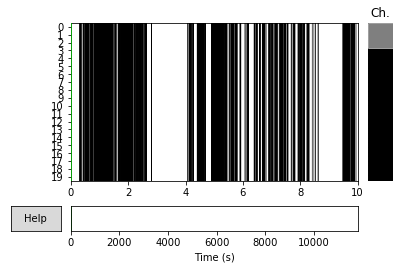

In [7]:
fig = raw.plot(n_channels=20)

In [8]:
filtered = raw.copy()
filtered.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 sec)



<RawArray  |  None, n_channels x n_times : 124 x 2359235 (11796.2 sec), ~2.18 GB, data loaded>

In [9]:
from mne.preprocessing import ICA

In [11]:
ica = ICA(max_pca_components=15, n_components=15, method='picard')

In [12]:
ica.fit(raw, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Selection by number: 15 components
Fitting ICA took 412.7s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 15 components, channels used: "eeg">

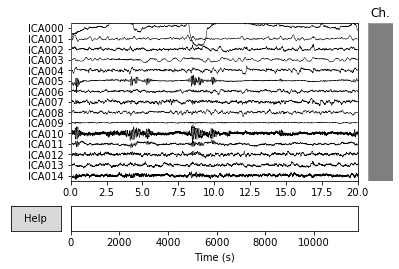

In [13]:
raw.load_data()
_ = ica.plot_sources(raw)

Transforming to ICA space (15 components)
Zeroing out 1 ICA components


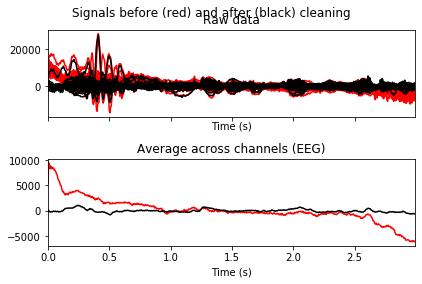

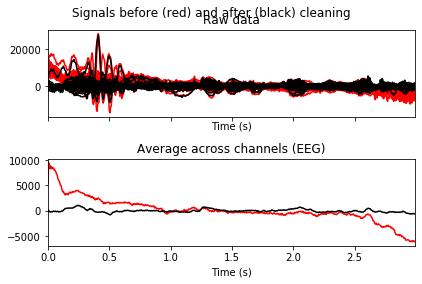

In [15]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')

In [ ]:
ica??

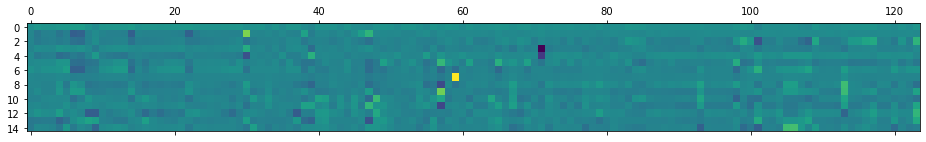

In [16]:
plt.matshow(ica.pca_components_)

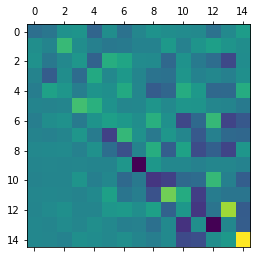

In [17]:
plt.matshow(ica.unmixing_matrix_)

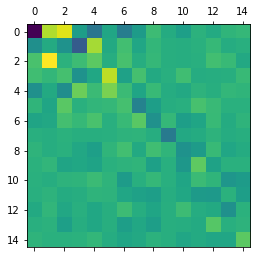

In [18]:
plt.matshow(ica.mixing_matrix_)

In [ ]:
ica.__dict__